# Hypothesis Testing

  * use sample info to test validity of conjectures about these parameters, such as whether the average daily return is above 0
  
# Step 1: Setting hypothesis

  * Null hypothesis $H_0$ : assertion if we are wrong, the one we want to reject
  * Alternative Hypothesis $H_a$: assertion we accept is null hypothesis is invalidated
  
## For example, we want to test if average daily return is not 0

$$
H_0: \mu = 0 \\
H_a: \mu \neq 0
$$

In [2]:
import pandas as pd
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

stock = pd.read_csv('./data/TSLA.csv', sep=r'\s*,\s*', encoding='ascii', engine='python')
stock[stock.columns[1:]] = stock[stock.columns[1:]].replace('[\$,]', '', regex=True).astype(float)
stock = stock.iloc[::-1] #reverse dataframe so dates are in ascending order
stock['Date'] = stock['Date'].convert_dtypes(convert_string=True)
stock.index = stock['Date'] #make date the index
stock.head()

stock['logReturn'] = np.log(stock['Close/Last'].shift(-1)) - np.log(stock['Close/Last'])


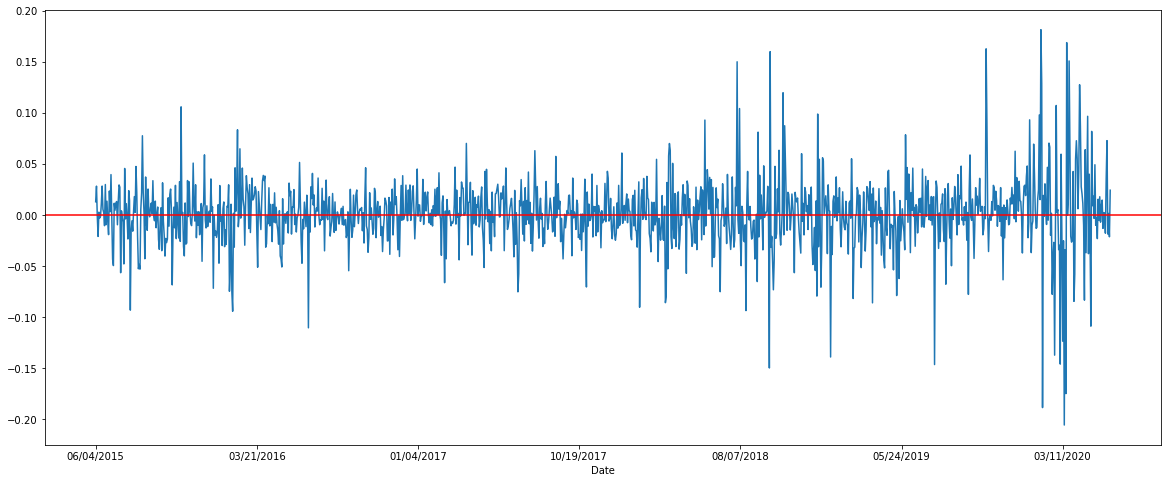

In [10]:
# Plot log returns for the 5 years
stock['logReturn']['06/04/2015':'06/04/2020'].plot(figsize=(20,8))
plt.axhline(0,color='red')
plt.show()

# Step 2: Calculate Test Statistic

## Z vs T Distribution
  * Given $H_0$ is correct, we can conclude $|\bar{x} - \mu | $ can not be very large
  * Given $H_0$ is correct, $\hat{z}$ can not be far from 0 and that standardized sample mean follows z distribution

![Z and T distribution](./img/z&t_distribution.png)

  * Z-distribution is based on population mean whereas t-distribution is based on sample mean
  * t-distribution has relatively fatter tails, but as sample size gets larger the shape of t-distribution will more closely resemble Z-distribution
  * larger sample size means t-distribution has greater degrees of freedom where DoF = n - 1
  * DoF = n - 1 because sample variance is constrained by the mean
  * this is why at significantly high sample size, we can substitute sample mean s for population mean $\mu$ in the above calculations

In [13]:
sample_mean = stock['logReturn'].mean()
sample_std = stock['logReturn'].std(ddof=1)
n = stock['logReturn'].shape[0]

# sample size for this example should be large enough to use z-distribution instead of t-distribution
# mu = 0 under null hypothesis
zhat = (sample_mean - 0)/(sample_std/n**(0.5))
print(zhat)

2.156090873913841


# Step 3: Set Decision criteria (i.e the confidence level)

  * decision criteria based on two-tail test

## Two-Tail Test

![Two Tail Test](./img/2-tail.png)

  * note that the 2 red tails are the rejection regions for our test where $\hat{z}$ is too far from 0, so we must reject $H_0$ in this case
  * $\alpha$ stands for significance value, so with $\alpha = 5%$ we have a 5% chance of rejecting $H_0$ wrongly


In [15]:
alpha = 0.05

z_left = norm.ppf(alpha/2, 0, 1)
z_right = -z_left #z-distribution is symmetric

print(z_left, z_right)

-1.9599639845400545 1.9599639845400545


# Step 4: Decide to Reject or Accept Null Hypothesis

  * If we accept $H_0$, then we can say with 95% (1 - alpha) confidence that the average return is 0
  * If we reject $H_0$, then we can say with 95% confidence that the average return is not 0

In [19]:
decision = "accept" if zhat >=z_left and zhat <=z_right else "reject"
print("At signifcance level of {}, we {} the null hypothesis".format(alpha, decision))

At signifcance level of 0.05, we reject the null hypothesis


# One-Tail Test

  * Null hypothesis $H_0: \mu \leq 0$ 
  * Alternative hypothesis $H_a: \mu > 0 $
  
![One Tail Test](./img/1-tail.png)

  * If we accept $H_0$, we're saying with 95% confidence that the average return is 0 or less
  * If we reject $H_0$, we're saying with 95% confidence that average return is more than 0 (positive).


In [20]:
# Step 2: Calculate Test Statistics
sample_mean = stock['logReturn'].mean()
sample_std = stock['logReturn'].std(ddof=1)
n = stock['logReturn'].shape[0]

# sample size for this example should be large enough to use z-distribution instead of t-distribution
# mu = 0 under null hypothesis
zhat = (sample_mean - 0)/(sample_std/n**(0.5))

#Step 3: Set Decision Criteria
alpha = 0.05
z_a = norm.ppf(1-alpha, 0, 1)

#Step 4: Make a decision
decision = "reject" if zhat > z_a else "accept"
print("At signifcance level of {}, we {} the null hypothesis".format(alpha, decision))

At signifcance level of 0.05, we reject the null hypothesis


# P-testing

Determine the probability (assuming $H_0$ true) of a more extreme test statistic in the direction of $H_a$ than what we've observed

For the following cases:
  * p <= $\alpha$ : p is small so it is "unlikely" we reject $H_0$ in favor of $H_a$
  * p > $\alpha$ : p is large, so it is "likely"; we accept $H_0$

In [21]:
p = 1 - norm.cdf(zhat, 0, 1)
decision = "reject" if p <= alpha else "accept"
print("At significance level of {}, we {} the null hypothesis".format(alpha, decision))

#in this case, rejecting null hypothesis means that we are confident in average returns being over 0

At significance level of 0.05, we reject the null hypothesis
